# Connecting Google Drive

In [2]:
# Google Drive Connect
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [24]:
import os
import kagglehub
# Download latest version
path = kagglehub.dataset_download("paultimothymooney/kermany2018")
print("Path to dataset files:", path)
base_path = os.path.join(path, "oct2017/OCT2017 ")
print("Base path set to:", base_path)

Path to dataset files: /kaggle/input/kermany2018
Base path set to: /kaggle/input/kermany2018/oct2017/OCT2017 


In [17]:
!ls '/root/.cache/kagglehub/datasets/paultimothymooney/kermany2018/versions/2/oct2017/OCT2017 '

test  train  val


# Data Distribution

In [26]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import shutil
from tqdm import trange

# 2. Dataset 클래스 정의
class RetinaDataset(Dataset):
    def __init__(self, CNV_dir, DME_dir, DRUSEN_dir, NORMAL_dir, transform=None):
        self.transform = transform
        self.data = []  # 이미지 경로와 레이블을 저장하는 리스트

        # CNV 데이터 추가
        if os.path.exists(CNV_dir):
            for img_name in sorted(os.listdir(CNV_dir)):
                self.data.append((os.path.join(CNV_dir, img_name), 0))  # Label: 0

        # DME 데이터 추가
        if os.path.exists(DME_dir):
            for img_name in sorted(os.listdir(DME_dir)):
                self.data.append((os.path.join(DME_dir, img_name), 1))  # Label: 1

        # DRUSEN 데이터 추가
        if os.path.exists(DRUSEN_dir):
            for img_name in sorted(os.listdir(DRUSEN_dir)):
                self.data.append((os.path.join(DRUSEN_dir, img_name), 2))  # Label: 2

        # NORMAL 데이터 추가
        if os.path.exists(NORMAL_dir):
            for img_name in sorted(os.listdir(NORMAL_dir)):
                self.data.append((os.path.join(NORMAL_dir, img_name), 3))  # Label: 3

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert("L")  # Grayscale로 변환

        if self.transform:
            image = self.transform(image)

        return image, label

# 3. 데이터 경로 설정 (공백 제거 및 실제 구조 반영)
TRAIN_CNV_PATH = os.path.join(path, "OCT2017 ", "train", "CNV")
TRAIN_DME_PATH = os.path.join(path, "OCT2017 ", "train", "DME")
TRAIN_DRUSEN_PATH = os.path.join(path, "OCT2017 ", "train", "DRUSEN")
TRAIN_NORMAL_PATH = os.path.join(path, "OCT2017 ", "train", "NORMAL")

VALID_CNV_PATH = os.path.join(path, "OCT2017 ", "val", "CNV")
VALID_DME_PATH = os.path.join(path, "OCT2017 ", "val", "DME")
VALID_DRUSEN_PATH = os.path.join(path, "OCT2017 ", "val", "DRUSEN")
VALID_NORMAL_PATH = os.path.join(path, "OCT2017 ", "val", "NORMAL")

TEST_CNV_PATH = os.path.join(path, "OCT2017 ", "test", "CNV")
TEST_DME_PATH = os.path.join(path, "OCT2017 ", "test", "DME")
TEST_DRUSEN_PATH = os.path.join(path, "OCT2017 ", "test", "DRUSEN")
TEST_NORMAL_PATH = os.path.join(path, "OCT2017 ", "test", "NORMAL")

# 4. 데이터 변환 설정
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
])

print("✅ Folder cleanup complete!")

# 6. 전체 데이터셋 설정
train_dataset = RetinaDataset(TRAIN_CNV_PATH, TRAIN_DME_PATH, TRAIN_DRUSEN_PATH, TRAIN_NORMAL_PATH, transform=transform)
valid_dataset = RetinaDataset(VALID_CNV_PATH, VALID_DME_PATH, VALID_DRUSEN_PATH, VALID_NORMAL_PATH, transform=transform)
test_dataset = RetinaDataset(TEST_CNV_PATH, TEST_DME_PATH, TEST_DRUSEN_PATH, TEST_NORMAL_PATH, transform=transform)

# 7. 개별 데이터셋 설정 (각 카테고리별로 단일 경로만 사용)
train_dataset_CNV = RetinaDataset(TRAIN_CNV_PATH, TRAIN_CNV_PATH, TRAIN_CNV_PATH, TRAIN_CNV_PATH, transform=transform)
train_dataset_DME = RetinaDataset(TRAIN_DME_PATH, TRAIN_DME_PATH, TRAIN_DME_PATH, TRAIN_DME_PATH, transform=transform)
train_dataset_DRUSEN = RetinaDataset(TRAIN_DRUSEN_PATH, TRAIN_DRUSEN_PATH, TRAIN_DRUSEN_PATH, TRAIN_DRUSEN_PATH, transform=transform)
train_dataset_NORMAL = RetinaDataset(TRAIN_NORMAL_PATH, TRAIN_NORMAL_PATH, TRAIN_NORMAL_PATH, TRAIN_NORMAL_PATH, transform=transform)

valid_dataset_CNV = RetinaDataset(VALID_CNV_PATH, VALID_CNV_PATH, VALID_CNV_PATH, VALID_CNV_PATH, transform=transform)
valid_dataset_DME = RetinaDataset(VALID_DME_PATH, VALID_DME_PATH, VALID_DME_PATH, VALID_DME_PATH, transform=transform)
valid_dataset_DRUSEN = RetinaDataset(VALID_DRUSEN_PATH, VALID_DRUSEN_PATH, VALID_DRUSEN_PATH, VALID_DRUSEN_PATH, transform=transform)
valid_dataset_NORMAL = RetinaDataset(VALID_NORMAL_PATH, VALID_NORMAL_PATH, VALID_NORMAL_PATH, VALID_NORMAL_PATH, transform=transform)

test_dataset_CNV = RetinaDataset(TEST_CNV_PATH, TEST_CNV_PATH, TEST_CNV_PATH, TEST_CNV_PATH, transform=transform)
test_dataset_DME = RetinaDataset(TEST_DME_PATH, TEST_DME_PATH, TEST_DME_PATH, TEST_DME_PATH, transform=transform)
test_dataset_DRUSEN = RetinaDataset(TEST_DRUSEN_PATH, TEST_DRUSEN_PATH, TEST_DRUSEN_PATH, TEST_DRUSEN_PATH, transform=transform)
test_dataset_NORMAL = RetinaDataset(TEST_NORMAL_PATH, TEST_NORMAL_PATH, TEST_NORMAL_PATH, TEST_NORMAL_PATH, transform=transform)

# 8. DataLoader 설정
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4)

# 개별 Train DataLoader
train_loader_CNV = DataLoader(train_dataset_CNV, batch_size=16, shuffle=True, num_workers=4)
train_loader_DME = DataLoader(train_dataset_DME, batch_size=16, shuffle=True, num_workers=4)
train_loader_DRUSEN = DataLoader(train_dataset_DRUSEN, batch_size=16, shuffle=True, num_workers=4)
train_loader_NORMAL = DataLoader(train_dataset_NORMAL, batch_size=16, shuffle=True, num_workers=4)

# 개별 Validation DataLoader
valid_loader_CNV = DataLoader(valid_dataset_CNV, batch_size=16, shuffle=False, num_workers=4)
valid_loader_DME = DataLoader(valid_dataset_DME, batch_size=16, shuffle=False, num_workers=4)
valid_loader_DRUSEN = DataLoader(valid_dataset_DRUSEN, batch_size=16, shuffle=False, num_workers=4)
valid_loader_NORMAL = DataLoader(valid_dataset_NORMAL, batch_size=16, shuffle=False, num_workers=4)

# 개별 Test DataLoader
test_loader_CNV = DataLoader(test_dataset_CNV, batch_size=16, shuffle=False, num_workers=4)
test_loader_DME = DataLoader(test_dataset_DME, batch_size=16, shuffle=False, num_workers=4)
test_loader_DRUSEN = DataLoader(test_dataset_DRUSEN, batch_size=16, shuffle=False, num_workers=4)
test_loader_NORMAL = DataLoader(test_dataset_NORMAL, batch_size=16, shuffle=False, num_workers=4)

print("✅ All DataLoaders successfully created with direct folder specification!")

✅ Folder cleanup complete!
✅ All DataLoaders successfully created with direct folder specification!


✅ Found 37205 images in /kaggle/input/kermany2018/oct2017/OCT2017 /train/CNV
✅ Found 11348 images in /kaggle/input/kermany2018/oct2017/OCT2017 /train/DME
✅ Found 8616 images in /kaggle/input/kermany2018/oct2017/OCT2017 /train/DRUSEN
✅ Found 26315 images in /kaggle/input/kermany2018/oct2017/OCT2017 /train/NORMAL
✅ Found 8 images in /kaggle/input/kermany2018/oct2017/OCT2017 /val/CNV
✅ Found 8 images in /kaggle/input/kermany2018/oct2017/OCT2017 /val/DME
✅ Found 8 images in /kaggle/input/kermany2018/oct2017/OCT2017 /val/DRUSEN
✅ Found 8 images in /kaggle/input/kermany2018/oct2017/OCT2017 /val/NORMAL
✅ Found 242 images in /kaggle/input/kermany2018/oct2017/OCT2017 /test/CNV
✅ Found 242 images in /kaggle/input/kermany2018/oct2017/OCT2017 /test/DME
✅ Found 242 images in /kaggle/input/kermany2018/oct2017/OCT2017 /test/DRUSEN
✅ Found 242 images in /kaggle/input/kermany2018/oct2017/OCT2017 /test/NORMAL


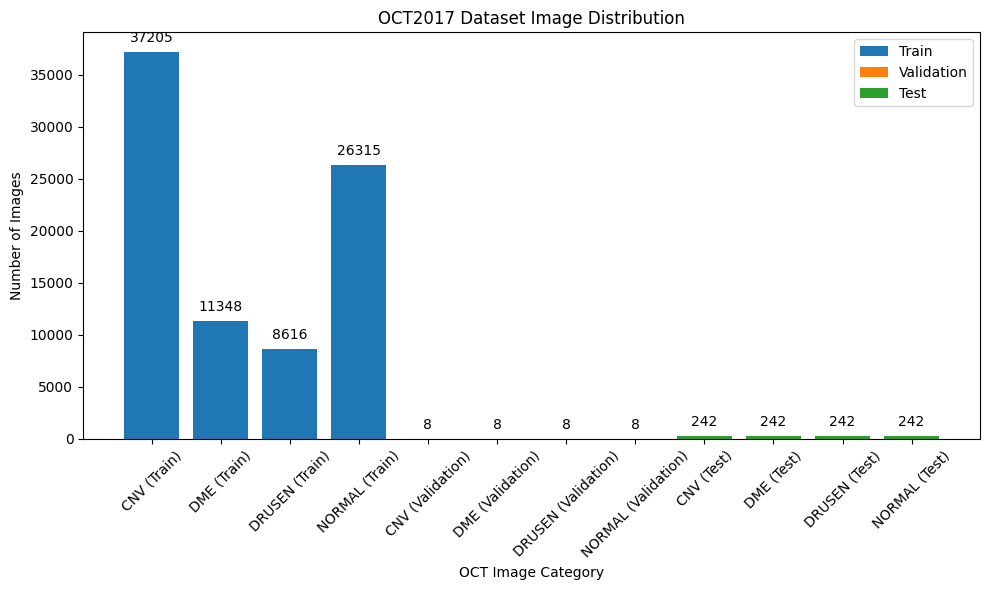

In [29]:
import os
import kagglehub
import matplotlib.pyplot as plt
import pandas as pd

data_dirs = {
    "Train": {
        "CNV": os.path.join(base_path, "train", "CNV"),
        "DME": os.path.join(base_path, "train", "DME"),
        "DRUSEN": os.path.join(base_path, "train", "DRUSEN"),
        "NORMAL": os.path.join(base_path, "train", "NORMAL"),
    },
    "Validation": {
        "CNV": os.path.join(base_path, "val", "CNV"),
        "DME": os.path.join(base_path, "val", "DME"),
        "DRUSEN": os.path.join(base_path, "val", "DRUSEN"),
        "NORMAL": os.path.join(base_path, "val", "NORMAL"),
    },
    "Test": {
        "CNV": os.path.join(base_path, "test", "CNV"),
        "DME": os.path.join(base_path, "test", "DME"),
        "DRUSEN": os.path.join(base_path, "test", "DRUSEN"),
        "NORMAL": os.path.join(base_path, "test", "NORMAL"),
    },
}

# 3. 경로 확인 및 이미지 개수 계산
data_distribution = []
for dataset_type, categories in data_dirs.items():
    for category, dir_path in categories.items():
        if os.path.exists(dir_path):
            count = len([f for f in os.listdir(dir_path) if f.endswith(('.jpeg', '.jpg', '.png'))])
            print(f"✅ Found {count} images in {dir_path}")
        else:
            count = 0
            print(f"🚨 Warning: {dir_path} does not exist!")
        data_distribution.append([dataset_type, category, count])

# 4. DataFrame 생성
df_distribution = pd.DataFrame(data_distribution, columns=["Dataset", "Category", "Count"])

# 5. 분포 시각화
fig, ax = plt.subplots(figsize=(10, 6))
bars = []

for dataset_type in df_distribution["Dataset"].unique():
    subset = df_distribution[df_distribution["Dataset"] == dataset_type]
    bars.extend(ax.bar(subset["Category"] + " (" + dataset_type + ")", subset["Count"], label=dataset_type))

# 막대 위에 숫자 추가
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',  # 정수로 표시
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # 5포인트 수직 오프셋
                textcoords="offset points",
                ha='center', va='bottom')

plt.xlabel("OCT Image Category")
plt.ylabel("Number of Images")
plt.title("OCT2017 Dataset Image Distribution")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # 레이아웃 조정으로 잘림 방지
plt.show()